# Sentiment analysis

# Twitter dataset

## Loading the data

In [1]:
!pip install spacy --upgrade

In [2]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 54.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import spacy
import en_core_web_sm
import pandas as pd
import seaborn as sns
import numpy as np
import re
import random
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train_data = pd.read_csv('/content/drive/MyDrive/NLP/train.csv', header = None, names = ['sentiment', 'id', 'date', 'query', 'user', 'text'], encoding = 'latin1')


In [6]:
train_data

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [8]:
train_data['sentiment'].unique()

array([0, 4])

In [ ]:
#sns.countplot(train_data['sentiment']);

In [9]:
np.unique(train_data['sentiment'], return_counts = True)

(array([0, 4]), array([800000, 800000]))

In [10]:
train_data = train_data.drop(['id', 'date', 'query', 'user'], axis = 1)
train_data

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [11]:
train_data

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


## Train and test data

In [12]:
# iloc is used to get only some columns, get text
# when working with ML, we need to separate variables
X = train_data.iloc[:, 1].values
X

array(["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
       "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
       '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
       ..., 'Are you ready for your MoJo Makeover? Ask me for details ',
       'Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur ',
       'happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H '],
      dtype=object)

In [13]:
# iloc is used to get only some columns, get sentiment
y = train_data.iloc[:, 0].values
y

array([0, 0, 0, ..., 4, 4, 4])

In [14]:
# we need to select only the small part of this data
# also we need to have train and test datasets

from sklearn.model_selection import train_test_split

# use only 3% of the dataset
X, _, y, _ = train_test_split(X, y, test_size = 0.97)

In [15]:
X

array(['I wish that I was borned in America so I can go to the store and buy Lines, Vines and Trying Times. ',
       "@thedeannab I don't know which to punish you more for: the Sonic Screwdriver pun or the BFE fringe desert town remark.  Boo to you. ",
       'Is loving life. ', ...,
       "@katyperry, aw, aren't we all hunnah. Well I loves you katy. You're spoiled with love from me. Haha! I don't get spoiled with no loves. ",
       "Playing a real guitar for the first time in months; my fingertips aren't used to this kind of abuse! ",
       "@TJBella ugh i'm good for the most part, just tired...i dont want to take pics  i cant tell if my bigger belly is fat or baby haha"],
      dtype=object)

In [16]:
X.shape

(48000,)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [18]:
X_train.shape, y_train.shape


((38400,), (38400,))

In [19]:
X_test.shape, y_test.shape

((9600,), (9600,))

In [20]:
# how many positive and negative tweets
np.unique(y_train, return_counts = True)

(array([0, 4]), array([19221, 19179]))

In [21]:
np.unique(y_test, return_counts = True)

(array([0, 4]), array([4798, 4802]))

# Preprocessing the data

In [22]:
nlp = spacy.load('en_core_web_sm')
nlp

In [23]:
def preprocessing(sentence):
  sentence = sentence.lower()

  #remove twitter handles
  sentence = re.sub(r"@[A-Za-z0-9]+", ' ', sentence)

  #remove links
  sentence = re.sub(r"https?://[A-Za-z0-9./-_=#]+", ' ', sentence)


  sentence = sentence.replace('.', '')
  tokens = []
  tokens = [token.text for token in nlp(sentence) if not (token.is_stop or token.like_num or token.is_punct or token.is_space or len(token) == 1)]
  tokens = ' '.join([element for element in tokens])
  return tokens

In [24]:
# apply the function:

preprocessing("https://colab.research.google.com/drive @Sophy93 Thank you! &lt;3 Someone who congratulates me instead of getting jealous at me..")

'thank lt;3 congratulates instead getting jealous'

In [25]:
# clean the training data
X_train_cleaned = [preprocessing(tweet) for tweet in X_train]

In [26]:
for _ in range(10):
  print(X_train_cleaned[random.randint(0, len(X_train_cleaned) - 1)])

got chemistry soon tho teacher know fuck chemistry copies book waste time
oh sorry hear soon
school friend tired
days skewl 7b miss guys lt;3
found prettiest camp rock lunch box straight haired kevin bad forgot card
wow thought
thanks hun hugs
sweet totally love meet awesome way lets
haha know mean cool takes time sink
moved san diego degree weather beach good combination


In [27]:
len(X_train_cleaned)

38400

In [29]:
X_test_cleaned = [preprocessing(tweet) for tweet in X_test]

In [30]:
len(X_test_cleaned)

9600

# Word Cloud

In [31]:
texts = ''
for text in X_train_cleaned:
  texts += ' ' + text

In [32]:
texts

" baker card reader working cashless means shopping hella depressed iiun kno damn photo gone jonas brothers fly music video airs today new episode jonas ft john taylor -elisa totally agree bailed early flaw argument haha good lol fanfics twilight ish stories written fans debs going come weekend thoughts farrah fawcett family nooo ill weeks know wanted juss gon na use relax focus fun fine wanna hear evening news punching dentist quot;finally&quot playing buddy wedding woke finally bought crank jason statham come aww extra cramping electrics going arm today skin healing think going scar looove quot;in out&quot miss burgers damnnnn left school family reunion olathe sociology expiriment hands smell like bleachblehbut apt nice clean writing plot century breakdown musical looking outside rain gon na rain till said weather channel great summer sun beach takes days ga board license syou discover time inefficient ga board owww god drop instablogscom herro cuteness hope good weekend almonds know

(-0.5, 399.5, 199.5, -0.5)

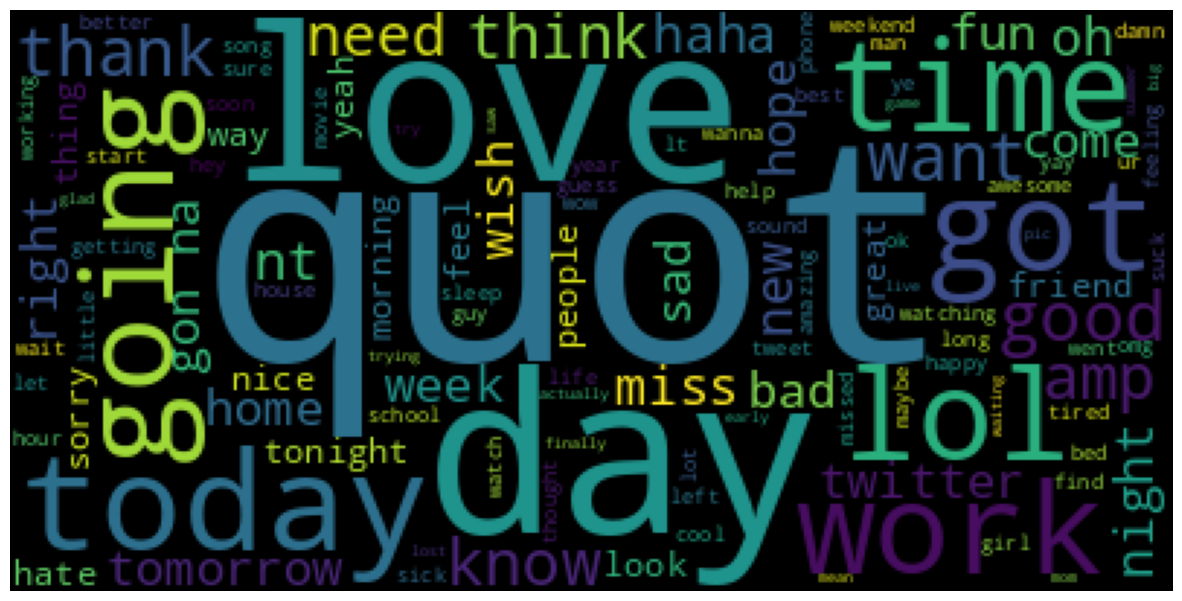

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud()
cloud = cloud.generate(texts)
plt.figure(figsize = (15,15))
plt.imshow(cloud)
plt.axis('off')

# Detecting Language

In [34]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=40ff02adbf451903ed332d328bae907dd93caf27b3c6c344a9e96cc5a0e5bcbf
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [35]:
from langdetect import detect

In [36]:
detect('你好')

'zh-cn'

In [37]:
languages = []
for text in X_train_cleaned:
  if not text.strip():
    languages.append('unknown')
    continue
  if len(text) < 3:
    languages.append('unknown')
    continue
  try:
    languages.append(detect(text))
  except:
    languages.append('unknown')


In [38]:
np.unique(languages, return_counts=True)

(array(['af', 'ca', 'cs', 'cy', 'da', 'de', 'en', 'es', 'et', 'fi', 'fr',
        'hr', 'hu', 'id', 'it', 'lt', 'lv', 'nl', 'no', 'pl', 'pt', 'ro',
        'sk', 'sl', 'so', 'sq', 'sv', 'sw', 'tl', 'tr', 'unknown', 'vi'],
       dtype='<U7'),
 array([ 2205,   262,    93,   661,   508,   118, 26916,   230,   505,
          227,   639,   100,    38,   354,   459,    26,    25,   717,
          618,   201,    91,   259,   100,   128,  1206,    92,   291,
          179,   671,   118,   319,    44]))

# Sentiment analysis with NLTK

In [39]:
'''
(Valence Aware Dictionary and sEntiment Reasoner) lexicon from the NLTK (Natural Language Toolkit) library.
This lexicon is used for sentiment analysis, particularly for social media text,
customer reviews, and other informal text.
'''

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [41]:
nltk_classifier = SentimentIntensityAnalyzer()
nltk_classifier.polarity_scores('I love this food')

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}

In [42]:
nltk_classifier.polarity_scores('I hate this food')

{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}

In [43]:
nltk_classifier.polarity_scores('I have this food')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [44]:
X_train_cleaned[0]

'baker card reader working cashless means shopping'

In [45]:
nltk_classifier.polarity_scores(X_train_cleaned[0])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [46]:
X_train_cleaned[1]

'hella depressed iiun kno'

In [47]:
nltk_classifier.polarity_scores(X_train_cleaned[1])

{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.5563}

In [48]:
for sentence in X_test_cleaned:
  print(nltk_classifier.polarity_scores(sentence), ' - ', sentence)

Streaming output truncated to the last 5000 lines.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}  -  goodmorning tweethearts covina high school graduation tonight plans day night today day school
{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}  -  photos great
{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.5106}  -  havin cuppa hatin thought work lovin 20days till birthday fun
{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'compound': 0.6249}  -  sounds great questions future options let know
{'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'compound': -0.5267}  -  dentist cheek teeth hurt
{'neg': 0.228, 'neu': 0.643, 'pos': 0.129, 'compound': -0.4019}  -  ok day ahead berlin yesterday wwii today cold war learning lots history day
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}  -  headache
{'neg': 0.407, 'neu': 0.593, 'pos': 0.0, 'compound': -0.6705}  -  hours later drunk drive shame letting drink peak spirits right
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound':

# Sentiment analysis with TF-IDF


In [49]:
X_train_cleaned[0:5]


['baker card reader working cashless means shopping',
 'hella depressed iiun kno',
 'damn photo gone',
 'jonas brothers fly music video airs today new episode jonas ft john taylor -elisa',
 'totally agree bailed early flaw argument haha']

In [50]:
y_train

array([0, 0, 0, ..., 0, 4, 4])

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# transform cleaned text to vector
X_train_tfidf = vectorizer.fit_transform(X_train_cleaned)



In [54]:
X_train_tfidf.toarray().shape

(38400, 33531)

In [57]:
len(vectorizer.get_feature_names_out())

33531

In [60]:
def preprocessing_lemma(sentence):
  tokens = []
  tokens = [token.lemma_ for token in nlp(sentence)]
  tokens = ' '.join([element for element in tokens])
  return tokens

In [62]:
preprocessing_lemma('learn learned learning')

'learn learn learning'

In [63]:
#dimentionality reduction using lemmatization

X_train_cleaned_lemma = [preprocessing_lemma(tweet) for tweet in X_train_cleaned]

In [64]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_cleaned_lemma)

In [65]:
X_train_tfidf.shape

(38400, 30119)

In [66]:
X_test_cleaned_lemma = [preprocessing_lemma(tweet) for tweet in X_test_cleaned]

In [67]:
X_test_tfidf = vectorizer.transform(X_test_cleaned_lemma)

In [68]:
X_test_tfidf.shape

(9600, 30119)

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

In [71]:
predictions = classifier.predict(X_test_tfidf)

In [72]:
predictions

array([0, 0, 0, ..., 4, 4, 4])

In [73]:
y_test

array([4, 0, 4, ..., 4, 4, 4])

In [74]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [75]:
accuracy_score(y_test, predictions)

0.6765625

In [76]:
confusion_matrix(y_test, predictions)

array([[3329, 1469],
       [1636, 3166]])

In [77]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      4798
           4       0.68      0.66      0.67      4802

    accuracy                           0.68      9600
   macro avg       0.68      0.68      0.68      9600
weighted avg       0.68      0.68      0.68      9600



# Sentiment Analysis with spaCy

link: https://spacy.io/usage/training

In [78]:
example = [['this is a positive text', {"POSITIVE":True, "NEGATIVE": False}],
           ['this is a negative text', {"POSITIVE":False, "NEGATIVE": True}]]

In [80]:
X_train_spacy = []
for text, sentiment in zip(X_train_cleaned_lemma, y_train):
 # print(text, sentiment)
 if sentiment == 4:
  dic = {"POSITIVE":True, "NEGATIVE": False}
 elif sentiment == 0:
  dic = {"POSITIVE":False, "NEGATIVE": True}
 X_train_spacy.append([text, dic.copy()])

In [81]:
X_train_spacy[0:5]

[['baker card reader working cashless mean shop',
  {'POSITIVE': False, 'NEGATIVE': True}],
 ['hella depress iiun kno', {'POSITIVE': False, 'NEGATIVE': True}],
 ['damn photo go', {'POSITIVE': False, 'NEGATIVE': True}],
 ['jonas brother fly music video air today new episode jonas ft john taylor -elisa',
  {'POSITIVE': True, 'NEGATIVE': False}],
 ['totally agree bail early flaw argument haha',
  {'POSITIVE': True, 'NEGATIVE': False}]]

In [82]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [84]:
classifier_spacy = spacy.blank('en')
classifier_spacy.pipe_names

[]

In [85]:
textcat = classifier_spacy.add_pipe('textcat')
classifier_spacy.pipe_names

['textcat']

In [86]:
textcat.add_label('POSITIVE')
textcat.add_label('NEGATIVE')

1

In [87]:
textcat.label_data

('POSITIVE', 'NEGATIVE')

In [88]:
from spacy.training import Example
classifier_spacy.begin_training()
for epoch in range(10):
  random.shuffle(X_train_spacy)
  #error
  losses = {}
  for batch in spacy.util.minibatch(X_train_spacy, size = 1024):
    texts = [classifier_spacy.make_doc(text) for text, entities in batch]
    annotations = [{'cats': entities} for text, entities in batch]
    examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(texts, annotations)]
    classifier_spacy.update(examples, losses=losses)
  print(losses)

{'textcat': 7.968798369169235}
{'textcat': 5.8550406992435455}
{'textcat': 4.3719261437654495}
{'textcat': 2.8584780395030975}
{'textcat': 1.7096796296536922}
{'textcat': 1.123274877667427}
{'textcat': 0.8302179519087076}
{'textcat': 0.7663414683192968}
{'textcat': 0.68027522880584}
{'textcat': 0.6184431742876768}


In [89]:
#save classifier
classifier_spacy.to_disk('classifier_spacy')

In [90]:
classifier_spacy_loaded = spacy.load('classifier_spacy')
classifier_spacy_loaded

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [97]:
y_test[124]

4

In [98]:
positive_text = X_test_cleaned_lemma[124]
positive_text

'get begin riff perfect'

In [99]:
prediction = classifier_spacy_loaded(positive_text)
prediction

get begin riff perfect

In [100]:
prediction.cats

{'POSITIVE': 0.23394913971424103, 'NEGATIVE': 0.7660508751869202}

In [107]:
classifier_spacy_loaded('it doesnt work').cats

{'POSITIVE': 0.8644967675209045, 'NEGATIVE': 0.13550329208374023}

In [109]:
negative_text = X_test_cleaned_lemma[123]
negative_text

'toss monster'

In [110]:
prediction = classifier_spacy_loaded(negative_text)
prediction.cats

{'POSITIVE': 0.7375525832176208, 'NEGATIVE': 0.26244741678237915}

In [113]:
classifier_spacy_loaded('i hate this food').cats

{'POSITIVE': 0.05508006736636162, 'NEGATIVE': 0.9449199438095093}

In [116]:
predictions = []
for text in X_test_cleaned_lemma:
  prediction = classifier_spacy_loaded(text)
  predictions.append(prediction.cats)


In [117]:
predictions

[{'POSITIVE': 0.9998533725738525, 'NEGATIVE': 0.00014659920998383313},
 {'POSITIVE': 0.0025369857903569937, 'NEGATIVE': 0.9974629878997803},
 {'POSITIVE': 0.10484874248504639, 'NEGATIVE': 0.8951511979103088},
 {'POSITIVE': 0.5221092104911804, 'NEGATIVE': 0.4778907895088196},
 {'POSITIVE': 0.9999732971191406, 'NEGATIVE': 2.674116512935143e-05},
 {'POSITIVE': 0.9978420734405518, 'NEGATIVE': 0.0021578879095613956},
 {'POSITIVE': 1.7295220459345728e-05, 'NEGATIVE': 0.9999827146530151},
 {'POSITIVE': 0.008366286754608154, 'NEGATIVE': 0.9916336536407471},
 {'POSITIVE': 0.11723899096250534, 'NEGATIVE': 0.8827610611915588},
 {'POSITIVE': 0.5221092104911804, 'NEGATIVE': 0.4778907895088196},
 {'POSITIVE': 0.9999910593032837, 'NEGATIVE': 8.90929459274048e-06},
 {'POSITIVE': 0.9999172687530518, 'NEGATIVE': 8.272585546365008e-05},
 {'POSITIVE': 0.9998099207878113, 'NEGATIVE': 0.00019004674686584622},
 {'POSITIVE': 0.9982494711875916, 'NEGATIVE': 0.0017504916759207845},
 {'POSITIVE': 0.0004320641455

In [118]:
predictions2 = []
for prediction in predictions:
  if prediction['POSITIVE'] > prediction['NEGATIVE']:
    predictions2.append(4)
  else:
    predictions2.append(0)
predictions2 = np.array(predictions2)

In [119]:
predictions2

array([4, 0, 0, ..., 0, 4, 4])

In [120]:
accuracy_score(y_test, predictions2)

0.696875

In [121]:
cm = confusion_matrix(y_test, predictions2)
cm

array([[3259, 1539],
       [1371, 3431]])

In [122]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      4798
           4       0.69      0.71      0.70      4802

    accuracy                           0.70      9600
   macro avg       0.70      0.70      0.70      9600
weighted avg       0.70      0.70      0.70      9600

